# LIBRARY

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#

# Data Wrangling

### Gethering Data

##### Membaca File day.csv dan hour.csv

In [95]:
day_df = pd.read_csv("data/day.csv", delimiter=",")
hour_df = pd.read_csv("data/hour.csv", delimiter=",")
print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

#

### Assesing Data day.csv dan hour.csv

##### Mencari Informasi Data day.csv dan hour.csv

In [96]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [97]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#

In [98]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


#

##### Memperindah Tabel Agar Mudah di Baca (Mapping)

In [99]:
# Mengubah "instant" menjadi "id_pengguna"
day_df.rename(columns={'instant': 'id_pengguna'}, inplace=True)

# Mengganti nilai-nilai pada "season" menjadi :
# 1: "Musim Semi"
# 2: "Musim Panas"
# 3: "Musim Gugur"
# 4: "Musim Dingin"
season_mapping = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
day_df['season'] = day_df['season'].map(season_mapping)

# Mengganti nilai pada "yr" menjadi :
# 1: "2011"
# 2: "2012"
yr_mapping = {0: 2011, 1: 2012}
day_df['yr'] = day_df['yr'].map(yr_mapping)

# Mengganti nilai pada "holiday" menjadi :
# 0: "Tidak"
# 1: "Ya"
holiday_mapping = {0: "Tidak", 1: "Ya"}
day_df['holiday'] = day_df['holiday'].map(holiday_mapping)

# Mengganti nilai pada 'weekday' menjadi :
# 0: "Minggu"
# 1: "Senin"
# 2: "Selasa"
# 3: "Rabu"
# 4: "Kamis"
# 5: "Jumat"
# 6: "Sabtu"
weekday_mapping = {0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"}
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)

# Mengganti nilai pada "workingday" menjadi :
# 0: "Tidak"
# 1: "Ya"
workingday_mapping = {0: "Tidak", 1: "Ya"}
day_df['workingday'] = day_df['workingday'].map(workingday_mapping)

# Mengganti nilai pada "weathersit" menjadi :
# 1: "Cerah"
# 2: "Mendung"
# 3: "Hujan"
# 4: "Badai"
weathersit_mapping = {1: "Cerah", 2: "Mendung", 3: "Hujan", 4: "Badai"}
day_df['weathersit'] = day_df['weathersit'].map(weathersit_mapping)

day_df.head()

,id_pengguna,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,Tidak,Sabtu,Tidak,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,1,Tidak,Minggu,Tidak,Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,1,Tidak,Senin,Ya,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,1,Tidak,Selasa,Ya,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,1,Tidak,Rabu,Ya,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [100]:
# Mengubah "instant" menjadi "id_pengguna"
hour_df.rename(columns={'instant': 'id_pengguna'}, inplace=True)

# Mengganti nilai-nilai pada "season" menjadi :
# 1: "Musim Semi"
# 2: "Musim Panas"
# 3: "Musim Gugur"
# 4: "Musim Dingin"
season_mapping = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
hour_df['season'] = hour_df['season'].map(season_mapping)

# Mengganti nilai pada "yr" menjadi :
# 1: "2011"
# 2: "2012"
yr_mapping = {0: 2011, 1: 2012}
hour_df['yr'] = hour_df['yr'].map(yr_mapping)

# Mengganti nilai pada "holiday" menjadi :
# 0: "Tidak"
# 1: "Ya"
holiday_mapping = {0: "Tidak", 1: "Ya"}
hour_df['holiday'] = hour_df['holiday'].map(holiday_mapping)

# Mengganti nilai pada 'weekday' menjadi :
# 0: "Minggu"
# 1: "Senin"
# 2: "Selasa"
# 3: "Rabu"
# 4: "Kamis"
# 5: "Jumat"
# 6: "Sabtu"
weekday_mapping = {0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"}
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)

# Mengganti nilai pada "workingday" menjadi :
# 0: "Tidak"
# 1: "Ya"
workingday_mapping = {0: "Tidak", 1: "Ya"}
hour_df['workingday'] = hour_df['workingday'].map(workingday_mapping)

# Mengganti nilai pada "weathersit" menjadi :
# 1: "Cerah"
# 2: "Mendung"
# 3: "Hujan"
# 4: "Badai"
weathersit_mapping = {1: "Cerah", 2: "Mendung", 3: "Hujan", 4: "Badai"}
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_mapping)

all_df = hour_df
all_df.head()

,id_pengguna,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,Tidak,Sabtu,Tidak,Cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,1,1,Tidak,Sabtu,Tidak,Cerah,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,1,2,Tidak,Sabtu,Tidak,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,1,3,Tidak,Sabtu,Tidak,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,1,4,Tidak,Sabtu,Tidak,Cerah,0.24,0.2879,0.75,0.0,0,1,1


Informasi yang didapat :
1. tidak ada missing value
2. dteday bertipe object, seharusnya datetime

#

### Cleaning data day.csv dan hour.csv

##### Bukti tidak ada missing value pada day.csv dan hour.csv

In [101]:
day_df.isnull().sum()

id_pengguna    0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64

In [102]:
hour_df.isnull().sum()

id_pengguna    0
dteday         0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64

#

##### Mengubah tipe dteday ke datetime

In [103]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#

##### Memeriksa Duplikasi Data

In [104]:
jumlah_duplikasi_day = day_df.duplicated().sum()
jumlah_duplikasi_hour = day_df.duplicated().sum()

In [105]:
print(f"Jumlah data day.csv duplikat: {jumlah_duplikasi_day}")
print(f"Jumlah data hour.csv duplikat: {jumlah_duplikasi_hour}")

Jumlah data day.csv duplikat: 0
Jumlah data hour.csv duplikat: 0


#

##### Memeriksa Kebersihan Data menggunakan Box Plot day.csv dan hour.csv

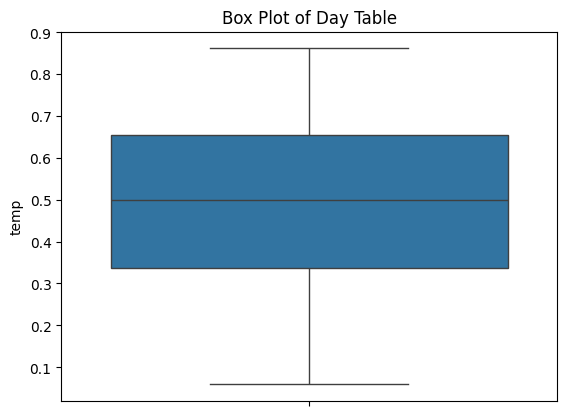

In [106]:
sns.boxplot(y=day_df['temp'])
plt.title('Box Plot of Day Table')
plt.show()

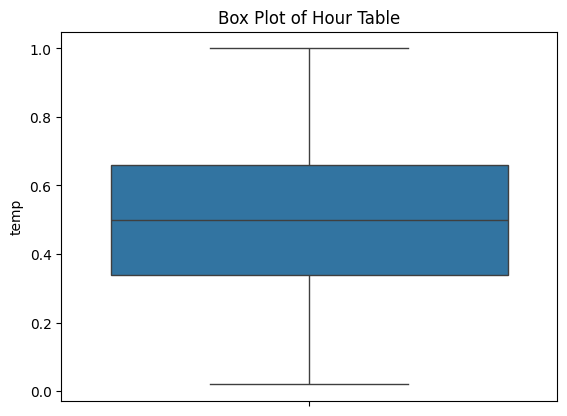

In [107]:
sns.boxplot(y=hour_df['temp'])
plt.title('Box Plot of Hour Table')
plt.show()

##### Kesimpulan : Data sudah bersih dari missing value, duplikasi, incorret type, dan lainnya.

#

#

# Exploratory Data

### Menganalisis Kondisi Cuaca Berdasarkan Cuaca dan Jumlah Pengguna

#### Data day.csv

<Axes: title={'center': 'Analisis Cuaca'}, xlabel='Tingkat Cuaca', ylabel='Jumlah Pengguna'>

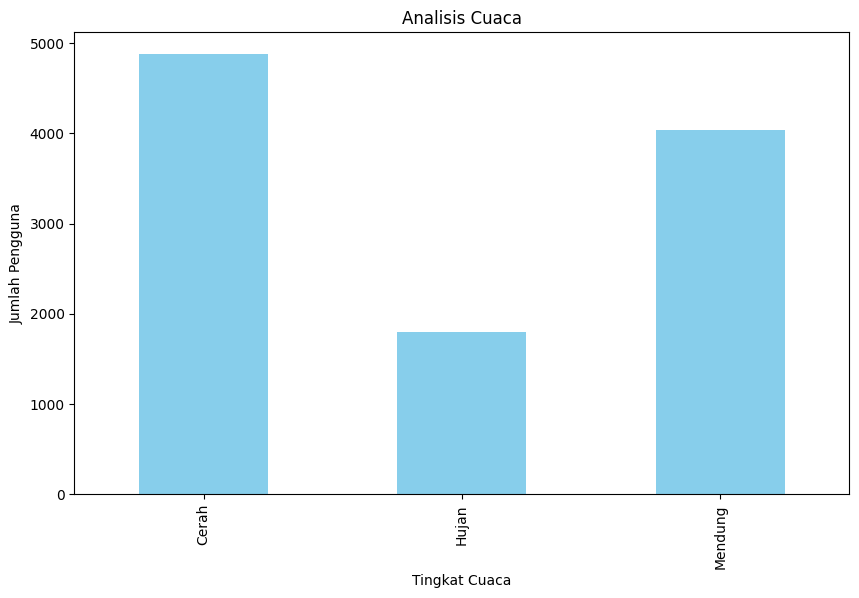

In [118]:
weather_trend = day_df.groupby('weathersit')['cnt'].mean()
weather_trend.plot(xlabel='Tingkat Cuaca', ylabel='Jumlah Pengguna', kind='bar', figsize=(10, 6), title='Analisis Cuaca', color='skyblue')

#

#### Data hour.csv

<Axes: title={'center': 'Analisis Cuaca'}, xlabel='Tingkat Cuaca', ylabel='Jumlah Pengguna'>

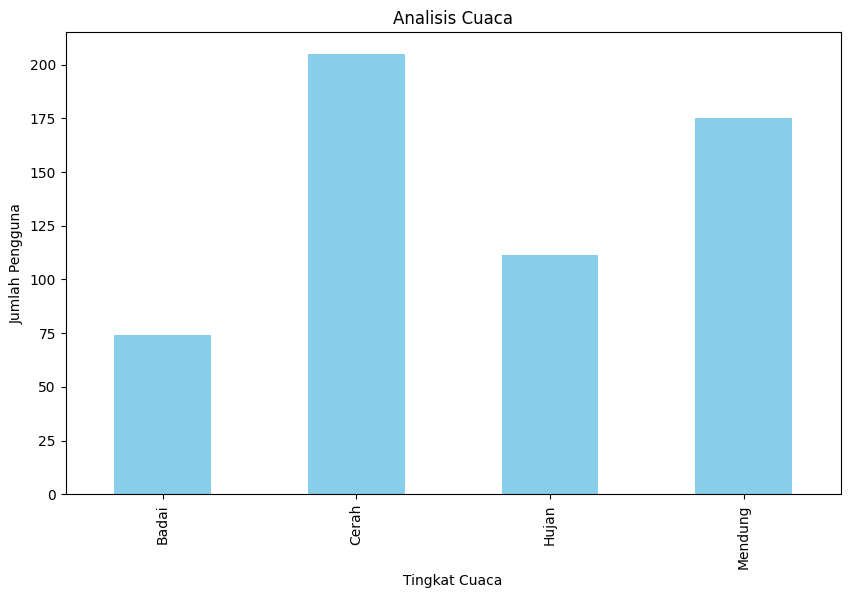

In [109]:
weather_trend = hour_df.groupby('weathersit')['cnt'].mean()
weather_trend.plot(xlabel='Tingkat Cuaca', ylabel='Jumlah Pengguna', kind='bar', figsize=(10, 6), title='Analisis Cuaca', color='skyblue')

#### Kesimpulan
##### Dari barchart di atas, dapat disimpulkan bahwa kondisi cuaca sangat mempengaruhi tingkat penggunaan sepeda.

#

### Menganalisis Trend Musiman Berdasarkan Bulan dan Jumlah Pengguna

##### Data day.csv

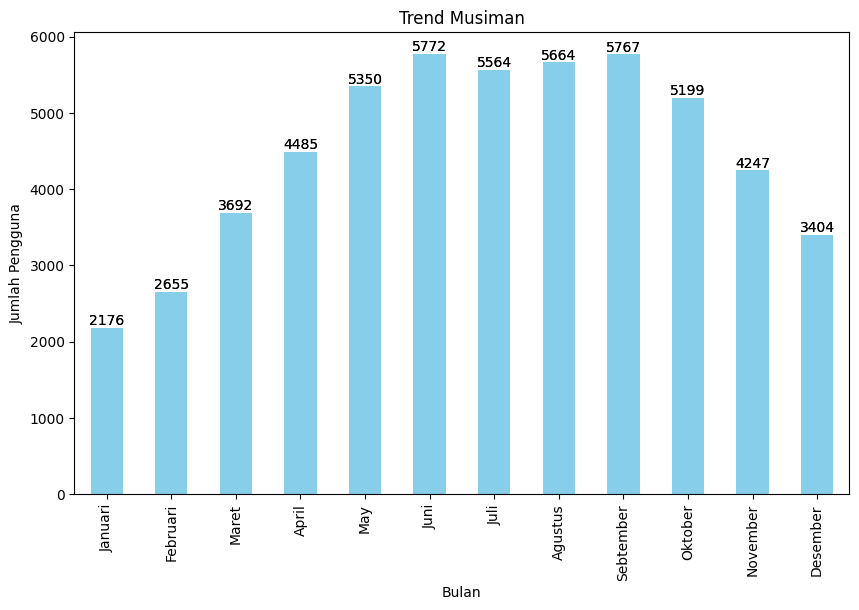

In [110]:
monthly_trend = day_df.groupby('mnth')['cnt'].mean()
monthly_trend.index = monthly_trend.index.map({1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "May", 6: "Juni", 7: "Juli", 8: "Agustus", 9: "Sebtember", 10: "Oktober", 11: "November", 12: "Desember"})
monthly_trend.plot(xlabel='Bulan', ylabel='Jumlah Pengguna', kind='bar', figsize=(10, 6), title='Trend Musiman')

ax = monthly_trend.plot(
    xlabel='Bulan', 
    ylabel='Jumlah Pengguna', 
    kind='bar', 
    figsize=(10, 6), 
    title='Trend Musiman',
    color='skyblue'
)

for bar in ax.patches:
    value = bar.get_height()  
    ax.text(
        bar.get_x() + bar.get_width() / 2,  #Posisi x
        value,  #Posisi y
        f'{value:.0f}',  #Format nilai tanpa desimal
        ha='center',  #Horizontal alignment
        va='bottom',  #Vertical alignment
        fontsize=10,  #Ukuran font
        color='black'  #Warna teks
    )

plt.show()

##### Data hour.csv

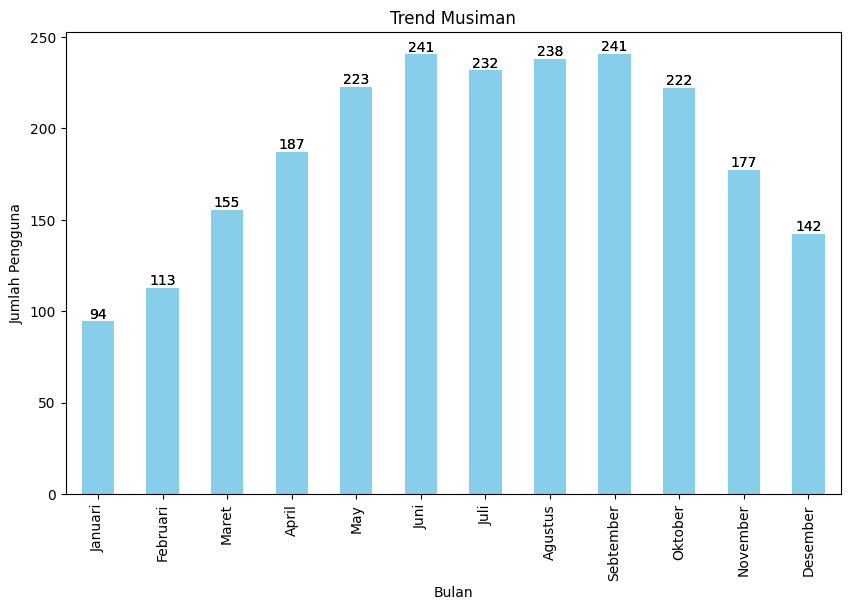

In [111]:
monthly_trend = hour_df.groupby('mnth')['cnt'].mean()
monthly_trend.index = monthly_trend.index.map({1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "May", 6: "Juni", 7: "Juli", 8: "Agustus", 9: "Sebtember", 10: "Oktober", 11: "November", 12: "Desember"})
monthly_trend.plot(xlabel='Bulan', ylabel='Jumlah Pengguna', kind='bar', figsize=(10, 6), title='Trend Musiman')

ax = monthly_trend.plot(
    xlabel='Bulan', 
    ylabel='Jumlah Pengguna', 
    kind='bar', 
    figsize=(10, 6), 
    title='Trend Musiman',
    color='skyblue'
)

for bar in ax.patches:
    value = bar.get_height()  
    ax.text(
        bar.get_x() + bar.get_width() / 2,  #Posisi x
        value,  #Posisi y
        f'{value:.0f}',  #Format nilai tanpa desimal
        ha='center',  #Horizontal alignment
        va='bottom',  #Vertical alignment
        fontsize=10,  #Ukuran font
        color='black'  #Warna teks
    )

plt.show()

#### Kesimpulan
##### Dari barchart di atas, dapat dilihat bahwa jumlah penggunaan sepeda tiap bulan bejalan secara konstan mengikuti trend.

#

### Membandingkan tingkat pengguna sepeda tiap bulan antara tabel day.csv dan hour.csv

Text(0.5, 1.0, 'Dari dataset day')

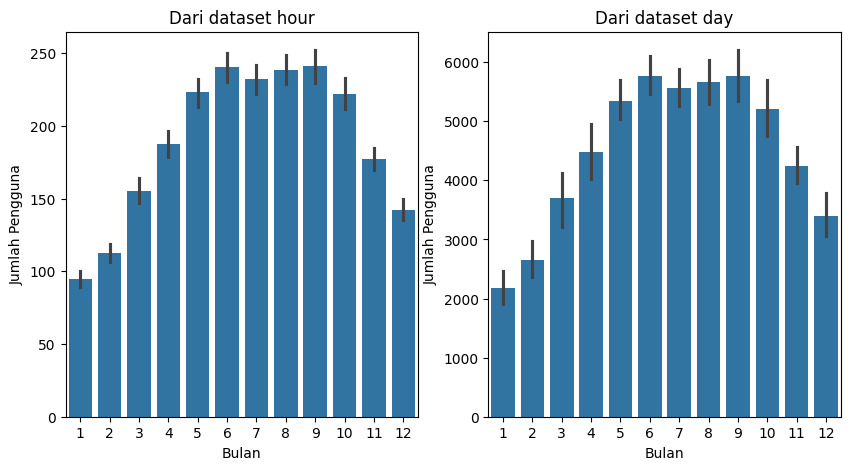

In [121]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10, 5))
sns.barplot(data = hour_df, x="mnth", y="cnt", ax=ax[0])
ax[0].set_ylabel("Jumlah Pengguna")
ax[0].set_xlabel("Bulan")
ax[0].set_title("Dari dataset hour")

sns.barplot(data = day_df, x="mnth", y="cnt", ax=ax[1])

ax[1].set_ylabel("Jumlah Pengguna")
ax[1].set_xlabel("Bulan")
ax[1].set_title("Dari dataset day")


#### Kesimpulan
##### Perbandingan tersebut hanya berbeda secara kuantitas, karena dataset day.csv cenderung lebih banyak penggunanya dibandingkan dengan tabel day.csv

#

## Menganalisis Jam Sibuk Berdasarkan Hari dan Jam

C:\Users\Khalif Umar Al Faruq\AppData\Local\Temp\ipykernel_25836\113739498.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = hour_df.pivot_table(index='hr', columns='weekday', values='cnt', aggfunc='mean')


<Axes: xlabel='weekday', ylabel='hr'>

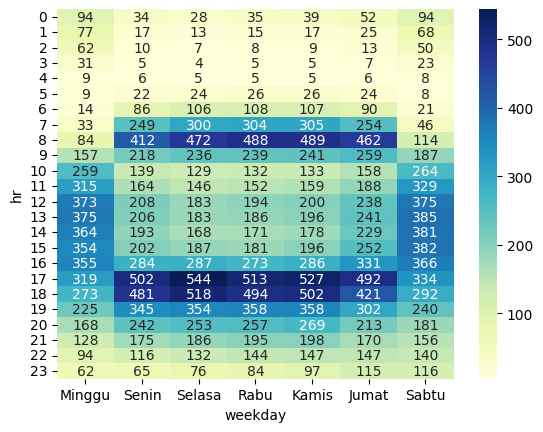

In [123]:
weekday_order = ["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"]
hour_df['weekday'] = pd.Categorical(hour_df['weekday'], categories=weekday_order, ordered=True)
heatmap_data = hour_df.pivot_table(index='hr', columns='weekday', values='cnt', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')

#### Kesimpulan
##### Dari pivot tabel di atas, dapat melihat trend jumlah pengguna sepeda di jam-jam tertentu pada setiap harinya.

#

### Mengetahui Trend Penggunaan Sepeda Terhadap Cuaca di 2 Tahun Terakhir

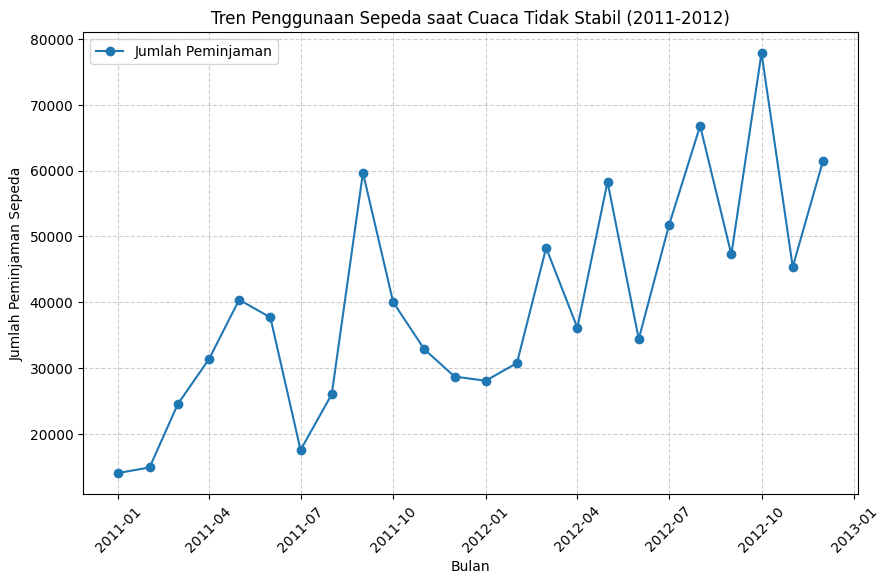

In [114]:
# Filter data untuk cuaca tidak stabil
unstable_weather_df = hour_df[hour_df['weathersit'].isin(["Mendung", "Hujan", "Badai"])]

# Agregasi data per bulan
monthly_trend = unstable_weather_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()
monthly_trend['tanggal'] = pd.to_datetime(monthly_trend['yr'].astype(str) + '-' + monthly_trend['mnth'].astype(str) + '-01')

# Plot tren bulanan
plt.figure(figsize=(10, 6))
plt.plot(monthly_trend['tanggal'], monthly_trend['cnt'], marker='o', linestyle='-', label='Jumlah Peminjaman')
plt.title('Tren Penggunaan Sepeda saat Cuaca Tidak Stabil (2011-2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.show()


#### Kesimpulan
##### Dari linechart di atas, dapat dianalisis bahwa penggunaan sepeda terjadi secara fluktuatif alias jumlahnya mengikuti kondisi kemungkinan yang lain (seperti cuaca, jam sibuk, dan lainnya)

#

## RFM (Recency, Frecuency, dan Monetary)

##### Mengetahui Trend Penggunaan Sepeda pada 6 bulan terakhir

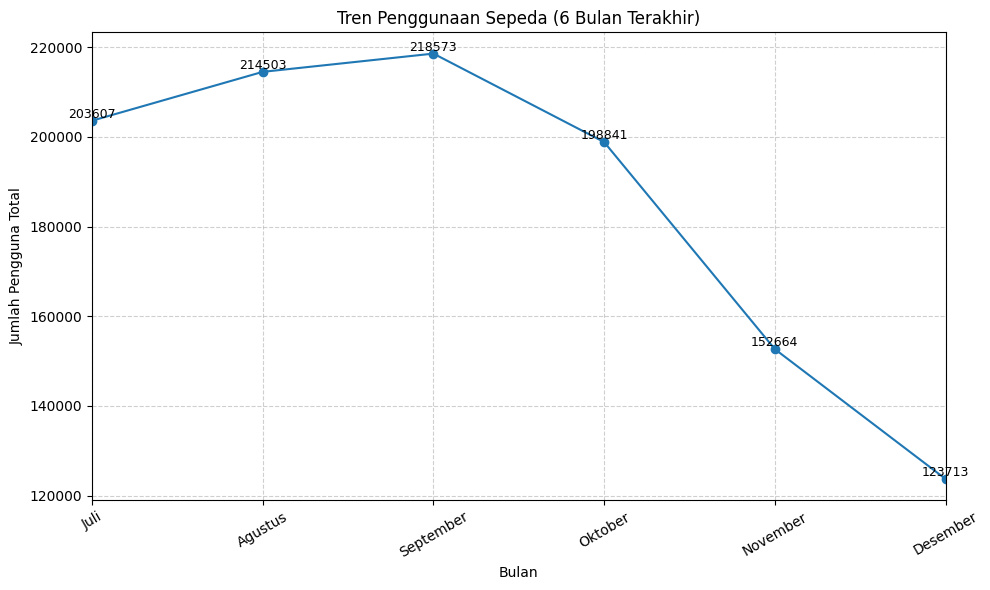

In [134]:
unstable_weather_df = hour_df[hour_df['weathersit'].isin(["Mendung", "Hujan", "Badai"])]
reference_date = pd.Timestamp("2012-12-31")  # Tanggal acuan

rfm = unstable_weather_df.groupby('id_pengguna').agg({
    'dteday': lambda x: (reference_date - x.max()).days,  # Recency
    'id_pengguna': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
}).rename(columns={'dteday': 'Recency', 'id_pengguna': 'Frequency', 'cnt': 'Monetary'})


recent_months_df = hour_df[hour_df['dteday'] >= pd.Timestamp("2012-07-01")]
usage_trend = recent_months_df.groupby(recent_months_df['dteday'].dt.month)['cnt'].sum()

# Periksa index data
usage_trend.index = range(1, len(usage_trend) + 1)  # Pastikan index sesuai

# Plot tren penggunaan sepeda
plt.figure(figsize=(10, 6))  # Ukuran figure
usage_trend.plot(kind='line', marker='o', title='Tren Penggunaan Sepeda (6 Bulan Terakhir)')

# Sumbu X
plt.xlabel('Bulan')
plt.xticks(ticks=range(1, 7), labels=['Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=30)

# Batasi sumbu X agar sesuai
plt.xlim(1, 6)  # Rentang untuk 6 bulan terakhir

# Sumbu Y
plt.ylabel('Jumlah Pengguna Total')
plt.grid(True, linestyle='--', alpha=0.6)

# Nominal value
for month, value in usage_trend.items():
    plt.text(month, value, str(value), fontsize=9, ha='center', va='bottom')

plt.tight_layout()  # Atur layout agar rapi
plt.show()



#### Kesimpulan
##### Di beberapa bulan terakhir terjadi penurunan jumlah penggunaan sepeda secara signifikan, dapat dipengaruhi oleh cuaca, jam sibuk, dan lainnya

#

#

## Pertanyaan Analisis Data
##### 1. Bagaimana performaa pengguna sepeda ketika cuaca tidak stabil di 2 tahun terakhir (2011-2012)?
##### 2. Apakah penggunaan sepeda masih ngetrend di beberapa bulan terakhir?
##### 3. Seberapa penting penggunaan sepeda di setiap harinya?

#

#

### Jawaban Dari Analisis Data

##### 1. Berdasarkan explorasi data pada "Mengetahui Trend Pengunaan Sepeda Terhadap Cuaca di 2 Tahun Terakhir", Dapat disimpulkan bahwa grafik penggunaan sepeda terjadi secara fluktuatif artinya orang cenderung akan melihat kondisi cuaca apabila ingin menggunakan sepeda

##### 2. Berdasarkan eksplorasi data RFM dengan title "Mengetahui Trend Pengunaan Sepeda pada 6 bulan terakhir", dapat disimpulkan bahwa grafik tersebut menunjukan adanya penurunan penggunaan sepeda bisa disebabkan oleh cuaca yang kurang mendukung.

##### 3. Berdasarkan eksplorasi data "Menganalisis Jam Sibuk Berdasarkan Hari dan Jam", dapat disimpulkan bahwa gambar tersebut menunjukan terdapat jam-jam tertentu dari penggunaan sepeda, bisa dari status harinya, apakah workingday, weekday, atau holiday